<a href="https://colab.research.google.com/github/NickMuz/workspace/blob/DataScience/DesvioPadrao_Tendencia_Dispersao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tmdb = pd.read_csv("tmdb_5000_movies.csv")
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns=['original_language','Total']
contagem_de_lingua.head()

#nao recomendado muito dificil entender a diferencia por area 
# plt.pie(contagem_de_lingua['Total'], labels = contagem_de_lingua['original_language'])
total_por_lingua=tmdb['original_language'].value_counts()
#localizar somente a linha que tem en
total_de_ingles = total_por_lingua.loc['en']
total_geral = total_por_lingua.sum()
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)


dados= {
    'lingua': ['ingles','outros'],
    'total': [total_de_ingles,total_do_resto]
}

dados

4505 298


{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

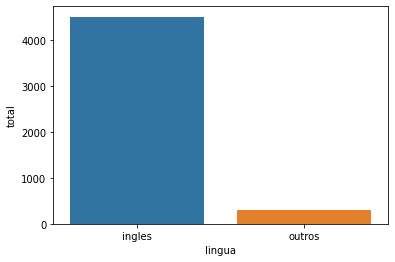

In [13]:
dados = pd.DataFrame(dados)
sns.barplot(x='lingua', y='total',data= dados)

([<matplotlib.patches.Wedge at 0x7fa3ca698d10>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

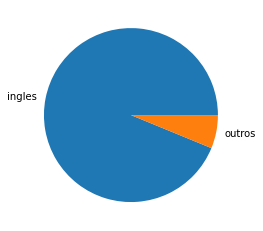

In [14]:
plt.pie(dados['total'], labels=dados['lingua'])

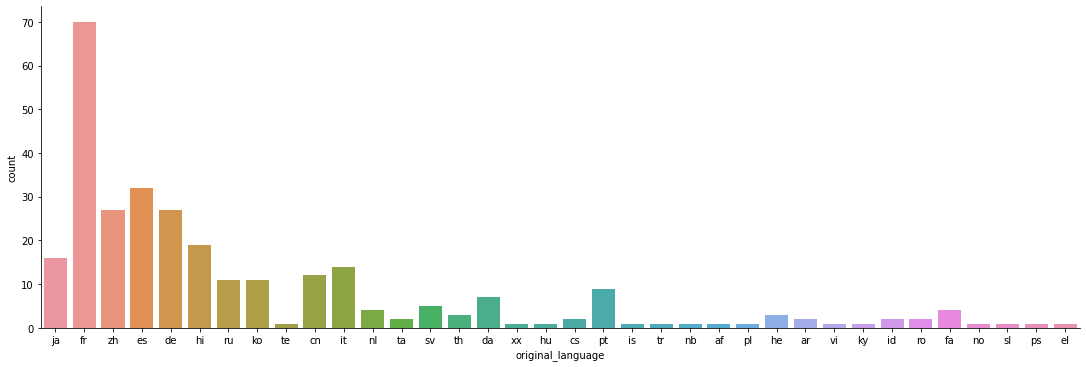

In [22]:
filmes_sem_lingua_original_em_ingles= tmdb.query("original_language!='en'")
total_por_lingua_de_outros_filmes =filmes_sem_lingua_original_em_ingles.original_language.value_counts()
sns.catplot(x='original_language', kind='count',data=filmes_sem_lingua_original_em_ingles,aspect=3)


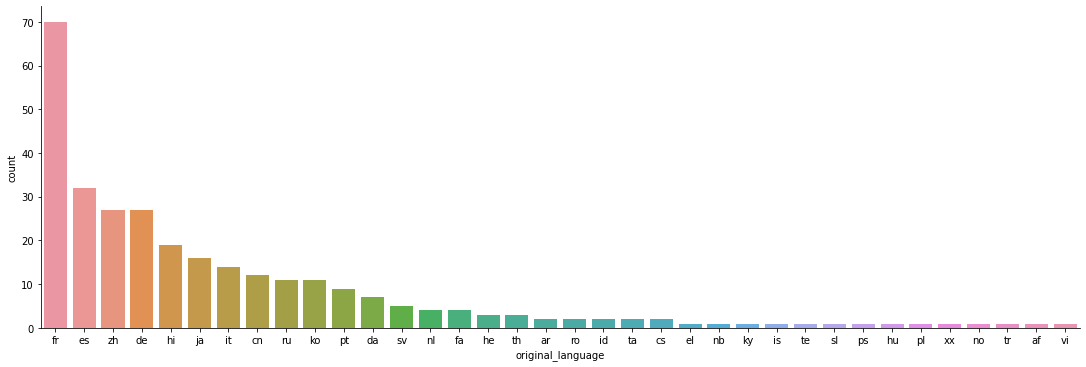

In [24]:
sns.catplot(x='original_language', kind='count',data=filmes_sem_lingua_original_em_ingles,aspect=3,order=total_por_lingua_de_outros_filmes.index)

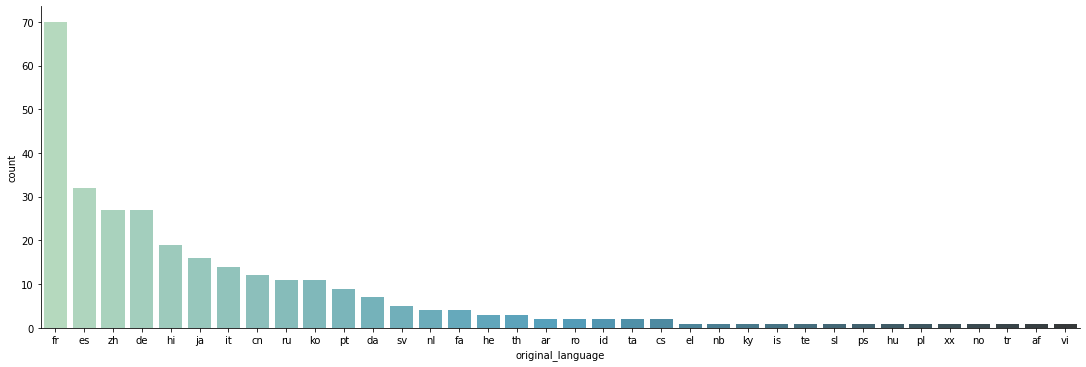

In [26]:
sns.catplot(x='original_language', kind='count',
            data=filmes_sem_lingua_original_em_ingles,aspect=3,palette="GnBu_d",
            order=total_por_lingua_de_outros_filmes.index)

In [62]:
filmes = pd.read_csv("movies.csv")
notas = pd.read_csv("ratings.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
notas.columns = ["Usuario_id", "filmeId", "nota", "momento"]

# filmes.head(2)
# notas.head()
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
########################
print(len(notas_do_jumanji), len(notas_do_toy_story))
print("Nota Média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota Média do Jumanji %.2f" % notas_do_jumanji.nota.mean())
########################
print("Nota Mediana do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota Mediana do Jumanji %.2f" % notas_do_jumanji.nota.median())
#########################
#Desvio padrao
print("Desvio Padrao do Toy Story %.2f" % np.std(notas_do_toy_story.nota))
print("Desvio Padrao do Jumanji %.2f" % np.std(notas_do_jumanji.nota))

110 215
Nota Média do Toy Story 3.92
Nota Média do Jumanji 3.43
Nota Mediana do Toy Story 4.00
Nota Mediana do Jumanji 3.50
Desvio Padrao do Toy Story 0.83
Desvio Padrao do Jumanji 0.88


In [43]:
import numpy as  np
filme1 = np.append(  np.array([2.5] * 10 ), np.array([3.5] * 10 ) )
filme2 = np.append(  np.array([5] * 10 ), np.array([1] * 10 ) )

{'boxes': [<matplotlib.lines.Line2D at 0x7fa3c0bb3490>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa3c0bd7650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa3c0bdd690>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa3c0bdd150>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa3c0bd1b90>,
  <matplotlib.lines.Line2D at 0x7fa3c0be7650>]}

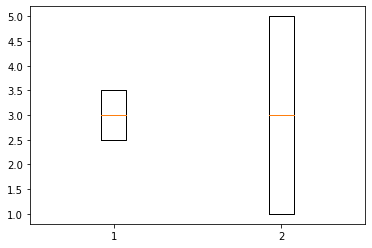

In [49]:
# print(filme1.mean())
# print(filme2.mean())
# print(np.median(filme1))
# print(np.median(filme2))

# plt.hist(filme1)
# plt.hist(filme2)

plt.boxplot([filme1,filme2])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7fa3ad81f410>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa3ad948150>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa3ad94e190>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa3ad948c10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa3ad937690>,
  <matplotlib.lines.Line2D at 0x7fa3ad94fe50>]}

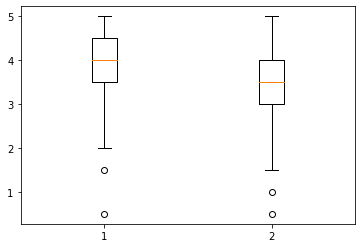

In [55]:
# sns.boxplot(notas_do_toy_story.nota)
# sns.boxplot(notas_do_jumanji.nota)
plt.boxplot([notas_do_toy_story.nota,notas_do_jumanji.nota ])

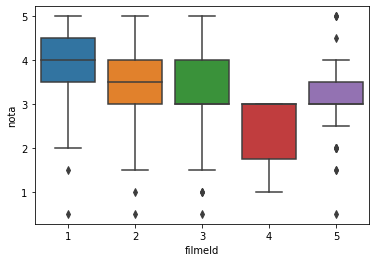

In [58]:
# sns.boxplot(x="filmeId",y="nota",data=notas.query("filmeId in [1,2]"))
sns.boxplot(x="filmeId",y="nota",data=notas.query("filmeId in [1,2,3,4,5]"))

In [60]:
#Desvio Padrao
print(notas_do_jumanji.nota.std(),notas_do_toy_story.nota.std())

0.8817134921476455 0.8348591407114045
